In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [51]:
df = pd.read_csv('EarthquakeData.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-04-26T23:20:43.982Z,15.5760,119.3247,10.00,4.6,mb,NaN,102.0,7.391,0.71,...,2019-04-27T00:13:43.040Z,"61km WSW of Bolitoc, Philippines",earthquake,9.8,1.9,0.053,106.0,reviewed,us,us
1,2019-04-26T23:14:09.859Z,15.5718,119.1792,10.00,4.4,mb,NaN,100.0,9.905,0.59,...,2019-05-10T23:15:56.040Z,"76km SW of Ilioilio, Philippines",earthquake,11.0,1.8,0.066,67.0,reviewed,us,us
2,2019-04-23T18:02:59.987Z,14.9108,120.5743,53.44,4.7,mb,NaN,118.0,7.879,0.75,...,2019-04-24T16:10:44.505Z,"1km ESE of Santa Cruz, Philippines",earthquake,9.1,7.5,0.046,144.0,reviewed,us,us
3,2019-04-22T15:38:40.496Z,13.7277,120.9237,142.31,4.3,mb,NaN,145.0,14.129,0.46,...,2019-05-05T15:26:59.040Z,"1km SW of Talaga, Philippines",earthquake,21.9,11.6,0.169,10.0,reviewed,us,us
4,2019-04-22T09:11:11.751Z,14.9566,120.5121,20.00,6.1,mww,NaN,20.0,0.943,1.04,...,2019-05-22T13:15:42.040Z,"0km ESE of Gutad, Philippines",earthquake,5.9,1.8,0.035,77.0,reviewed,us,us


In [52]:
print(list(df.columns))

['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']


In [53]:
df = df.loc[:,:'place']
df.drop(columns = ['nst','gap','dmin','rms','net','id','updated','magType'],inplace=True)
df.head()

,time,latitude,longitude,depth,mag,place
0,2019-04-26T23:20:43.982Z,15.5760,119.3247,10.00,4.6,"61km WSW of Bolitoc, Philippines"
1,2019-04-26T23:14:09.859Z,15.5718,119.1792,10.00,4.4,"76km SW of Ilioilio, Philippines"
2,2019-04-23T18:02:59.987Z,14.9108,120.5743,53.44,4.7,"1km ESE of Santa Cruz, Philippines"
3,2019-04-22T15:38:40.496Z,13.7277,120.9237,142.31,4.3,"1km SW of Talaga, Philippines"
4,2019-04-22T09:11:11.751Z,14.9566,120.5121,20.00,6.1,"0km ESE of Gutad, Philippines"


In [108]:
df['time'] = pd.to_datetime(df['time'],utc = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 0 to 1969
Data columns (total 6 columns):
time         1778 non-null datetime64[ns, UTC]
latitude     1778 non-null float64
longitude    1778 non-null float64
depth        1778 non-null float64
mag          1778 non-null float64
place        1778 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 97.2+ KB


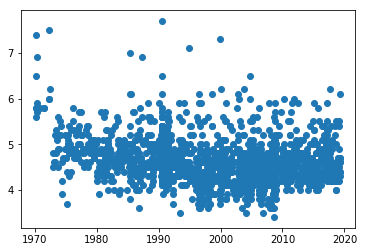

In [105]:
plt.scatter(df['time'],df['mag'])

In [106]:
df = df.query('mag > 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 0 to 1969
Data columns (total 6 columns):
time         1778 non-null datetime64[ns, UTC]
latitude     1778 non-null float64
longitude    1778 non-null float64
depth        1778 non-null float64
mag          1778 non-null float64
place        1778 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 97.2+ KB


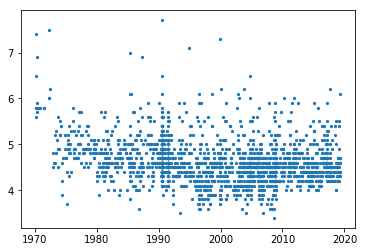

In [102]:
plt.scatter(df['time'],df['mag'],s = 5)

In [146]:
df.set_index('time')

import pytz
dt1 = dt.datetime(1991, 6, 15, 0, 0, 0, 0, pytz.UTC)
print(dt1)
dt2 = dt.datetime(1991, 6, 16, 0, 0, 0, 0, pytz.UTC)


df1991 = df.loc[(df['time'] > dt1) & (df['time'] < dt2)]

df1991.head(15)
#df1991 = df.loc[df['time'].dt.year == 1991]

1991-06-15 00:00:00+00:00


,time,latitude,longitude,depth,mag,place
1334,1991-06-15 22:19:22.430000+00:00,15.023,120.074,10.0,4.4,"Luzon, Philippines"
1335,1991-06-15 19:58:35.060000+00:00,15.199,120.427,15.6,4.9,"Luzon, Philippines"
1336,1991-06-15 19:48:53.520000+00:00,15.211,120.267,8.5,5.0,"Luzon, Philippines"
1337,1991-06-15 18:18:24.380000+00:00,15.050,120.636,10.0,4.5,"Luzon, Philippines"
1338,1991-06-15 17:42:32.480000+00:00,15.244,120.565,10.0,4.5,"Luzon, Philippines"
1339,1991-06-15 14:23:25.160000+00:00,14.974,120.545,10.0,4.7,"Luzon, Philippines"
1340,1991-06-15 14:18:13.620000+00:00,15.162,120.415,10.0,4.3,"Luzon, Philippines"
1341,1991-06-15 13:48:43.180000+00:00,15.075,120.607,10.0,4.9,"Luzon, Philippines"
1342,1991-06-15 13:42:15.580000+00:00,15.114,120.351,10.0,4.6,"Luzon, Philippines"
1343,1991-06-15 13:39:20.110000+00:00,15.119,120.573,10.0,4.6,"Luzon, Philippines"


(array([726998.33333333, 726998.41666667, 726998.5       , 726998.58333333,
        726998.66666667, 726998.75      , 726998.83333333, 726998.91666667]),
 <a list of 8 Text xticklabel objects>)

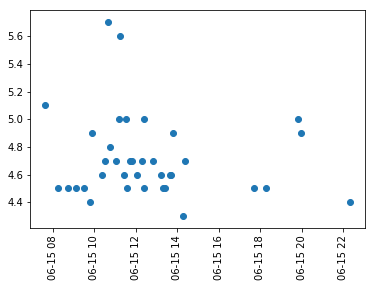

In [149]:
plt.scatter(df1991['time'],df1991['mag'])
plt.xticks(rotation=90)

In [152]:
df1 = pd.read_csv('VolcanicForcing.csv')
df1.head()

,2.8,5.6,8.4,11.2,14,16.8,19.6,22.4,25.2,28,...,154,156.8,159.6,162.4,165.2,168,170.8,173.6,176.4,179.2
0,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,...,0.003435,0.003435,0.003435,0.003435,0.002935,0.002265,0.002265,0.002265,0.002265,0.002265
1,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,...,0.003161,0.003161,0.003161,0.003161,0.002629,0.001917,0.001917,0.001917,0.001917,0.001917
2,0.002676,0.002676,0.002676,0.002676,0.002676,0.002809,0.002908,0.002908,0.002908,0.002908,...,0.002908,0.002908,0.002908,0.002908,0.002358,0.001623,0.001623,0.001623,0.001623,0.001623
3,0.002265,0.002265,0.002265,0.002265,0.002265,0.015278,0.025000,0.025000,0.025000,0.025000,...,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676
4,0.001917,0.001917,0.001917,0.001917,0.001917,0.029438,0.050000,0.050000,0.050000,0.050000,...,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462


In [187]:
df1['year'] = df1.index/12 + 1890
df1['year'] = df1['year'].astype(int)
df1['month'] = df1.index % 12 + 1

#df1['date'] = str(df1['year'])+ str(df1['month'])
df1['date'] = pd.to_datetime(df1['year'].astype(str) + df1['month'].astype(str), format='%Y%m')

df1.head(15)
df1['total'] = df1.loc[:, '2.8':'179.2'].sum(1)



In [191]:
rand = df1.query('year >1990 and year < 1995')

(array([726833., 727014., 727198., 727380., 727564., 727745., 727929.,
        728110., 728294.]), <a list of 9 Text xticklabel objects>)

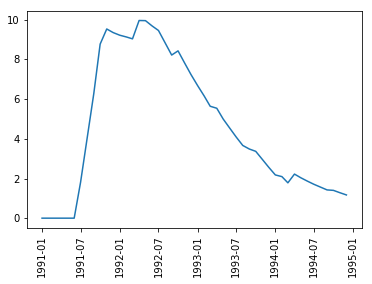

In [193]:
plt.plot(rand['date'],rand['total'])
plt.xticks(rotation=90)

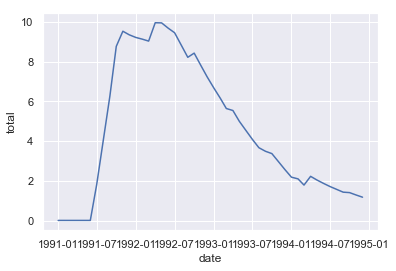

In [196]:
sns.set(style="darkgrid")
sns.lineplot(rand['date'],rand['total'])